## LAB 3: Convolutional Neural Network

ING5, Grp 2 | BASOCAK Axel &amp; PREHU Emma &amp; RATTON Lucas

### Part 2: Train CNN with TensorFlow

1. Import libraries : Tensorflow and Matplotlib

In [57]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2. Download and prepare the dataset

=> We load the MNIST dataset :

In [58]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

3. Normalize Pixel Values

In [59]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [60]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


4. Upload Dataset

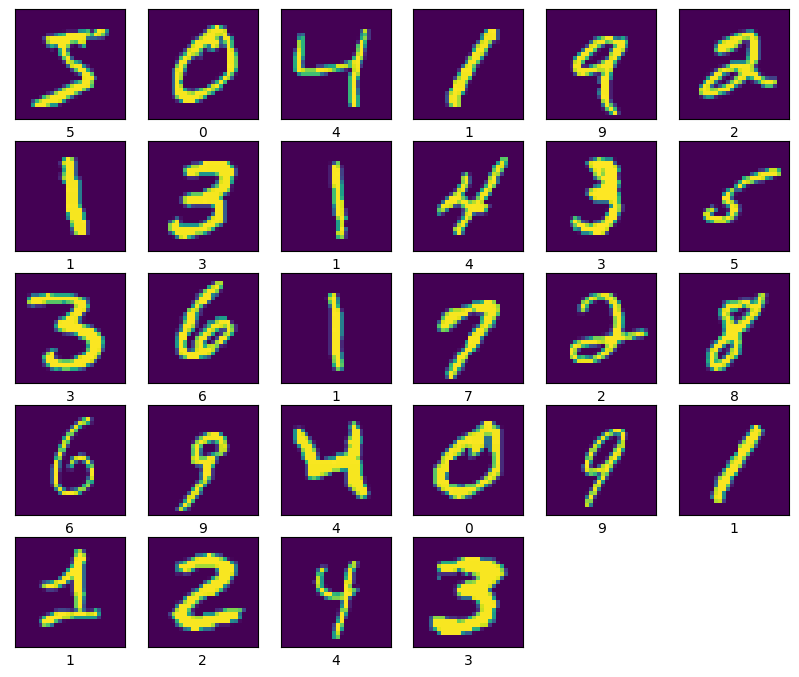

In [61]:
plt.figure(figsize = (10,10))

for i in range(28):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train[i])
plt.show()

=> We need to reshape X_train and X_Test, so we add an dimension with the np.expand_dims fonction

In [62]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

=> "-1" to display the axis, to obtain (28,28,1). With "1", we would have (1,28,28)

In [63]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

- We add the Input layer, Convolutional layer, Pooling layer, an second Convolutional Layer and Pooling Layer and 2 Dense layer. 
- We need to put the input shape to (28,28,1) because the model didn't accept the input_shape = (28,28). 
- This is why we used the fonction np.expand_dims. 
- The number 28 is the size of height and width and we added a number (equal to 1) because of the expand dims

In [64]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Compile and train the model

In [66]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1475 - accuracy: 0.9538 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0322 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0302 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0303 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0304 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0269 -

=> We have the value of loss training (loss) and testing (val_testing) for each epoch (1 to 10). The different between these two values is very small and the final value goes very down (equal to 0.0089 and 0.0368).

=> We have the value of accuracy training (accuracy) and testing (val_accuracy) for each epoch. The different between training and validation accuracy is not big that means we won't have a situation of overfitting. And the value are very good => 0.9916 and 0.9973 for the 10th epoch

=> At the end of the 10 epochs, we have excellent scores for the loss and accuracy.

In [70]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

- We have the value of accuracy training (accuracy) and testing (val_accuracy) for each epoch. The gap between training and validation accuracy is not large that means we won't have a situation of overfitting. 
- Also, we can see the model is growing very fast over epoch, that means the model is improving quickly with experience. 

In [68]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)

313/313 - 2s - loss: 0.0368 - accuracy: 0.9916


In [69]:
print(test_acc)

0.991599977016449


We have a test accuracy equal to 99% that is a very high score.